In [1]:
# imports:  
import torch
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(0);

# Underfitting vs. overfitting: role of model complexity and data amount

----

### Create a polynomial fitting model: $y=\alpha_0 + \alpha_1 x + \alpha_2 x^2 + \dots + \alpha_{d-1} x^{d-1} + x^d$

----

### For your convenience, the following function run(...) encapsulates all the codes from the previous workbook into one single function with parameters: 
- func
- d
- lr
- n_train
- n_test

### run() returns two outputs:
- final_train_loss (loss on train data after last epoch)
- final_test_loss (loss on test data after last epoch)

In [2]:
def run(func, d, lr, num_epochs, n_train, n_test):

    # Generate training data
    # Make sure that number that data is arranged ROW-wise
    x_train = torch.linspace(start=0.,end=1.,steps=n_train).unsqueeze(-1)
    y_train = func(x_train)
    
    # Generate test data
    # Make sure that number that data is arranged ROW-wise
    x_test = torch.linspace(start=0.,end=1.,steps=n_test).unsqueeze(-1)
    y_test = func(x_test)
    
    # Create a function to make a prediction given some alpha and x
    def model(alpha, x):
        y = x**d
        for i in range(d):
            y += alpha[i] * (x**i)
        return y
    
    # Polynomial coefficients: these are your unknowns that need to be estimated based on the data
    alpha = torch.zeros(d)
    
    # Define an empty list to store loss history
    train_loss_history = []
    test_loss_history = []

    # Since, we want to find the value of alpha using optimization, set .requires_grad to True for alpha
    alpha.requires_grad = True

    # Optimizer: use Adam
    optimizer = torch.optim.Adam([alpha], lr=lr)

    # Loss function: use the MEAN SQUARED ERROR (MSE) as loss
    loss_function = torch.nn.MSELoss()

    # begin iterating over epochs
    for epoch in range(num_epochs):

        # Make your predictions, USE TRAINING DATA ONLY!!
        y_train_pred = model(alpha, x_train)

        # Compute the loss. 
        train_loss = loss_function(y_train_pred, y_train)

        # store the loss in a list
        train_loss_history.append(train_loss.detach().item())

        # Call .backward() on loss to compute gradient (d_loss/d_a)
        train_loss.backward()

        # Update the model paramaeters (in this case: alpha)
        # No need for torch.no_grad() anymore with in-built optimizers
        optimizer.step()

        # remove any pre-exisitng gradients stored
        optimizer.zero_grad()

        # We also track the loss on test data but don't use that information for training (just for monitoring purpose)
        with torch.no_grad(): #torch.no_grad() is back because we don't train on test data and so don't need gradients

            # Make your predictions
            y_test_pred = model(alpha, x_test)

            # Compute the loss. 
            test_loss = loss_function(y_test_pred, y_test)

            # store the loss in a list
            test_loss_history.append(test_loss.detach().item())


    #------------------------------------------------------------
    fig = plt.figure(figsize=plt.figaspect(0.4))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(train_loss_history)
    ax.plot(test_loss_history)
    ax.legend(['Train-pred loss','Test-pred loss'])
    ax.set_yscale('log')
    ax.set_ylim(1e-4,10)
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(x_train, y_train,linestyle = 'None',marker='*')
    ax.plot(x_test, y_test)
    ax.plot(x_test, y_test_pred)
    ax.legend(['Train','Test-true','Test-pred'])
    fig.suptitle('Polynomial degree: d={}'.format(d), fontsize=18)
    # print('alpha:',list(alpha.detach()))
    final_train_loss = train_loss_history[-1]
    final_test_loss = test_loss_history[-1]
    return final_train_loss, final_test_loss


### Here's the function we are trying to learn. The example from the previous workbook is already coded here

In [3]:
# Hidden function that we want to learn
def func(x):
    pi = np.pi
    z = torch.sin(2*pi * x)
    return z

### Use run() and func() to explore the effect of model complexity on quality of the fit. In the case of polynomial regression, model complexity is given by the polynomial degree.

- To get started, use lr=0.01, num_epochs=10000, n_train=6, n_test=100, and try different values of 'd'. We will discuss your observations after the exercise.
- Once you have made your observations and time permitting, start playing with other parameters and functions (in func)

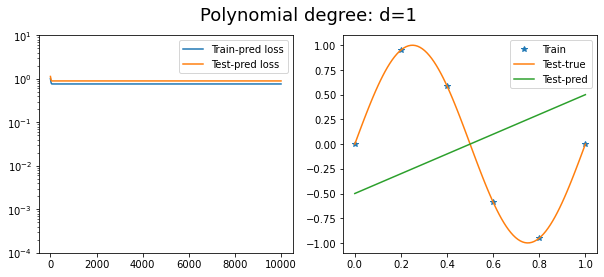

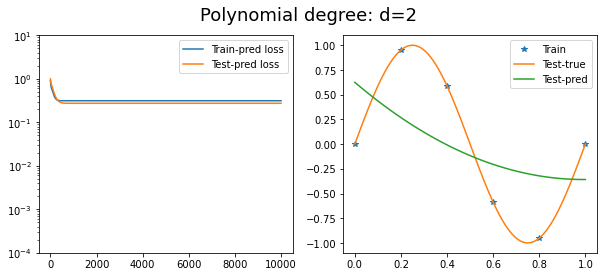

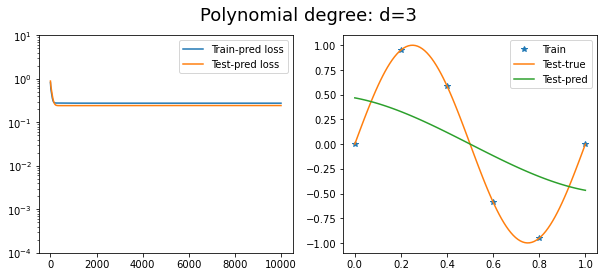

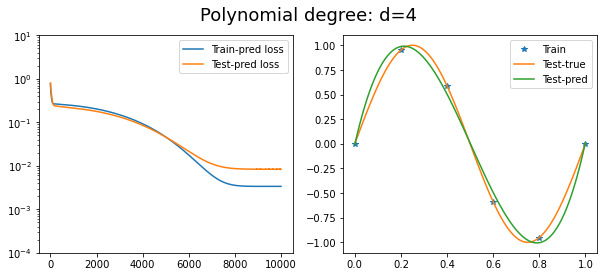

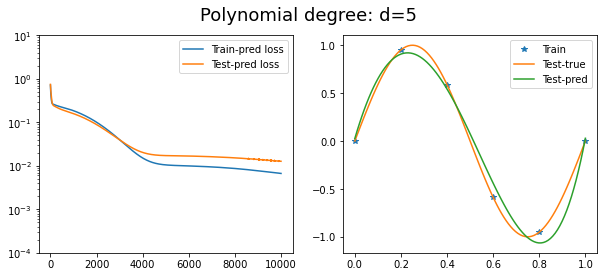

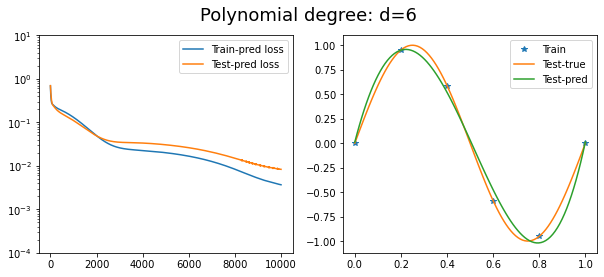

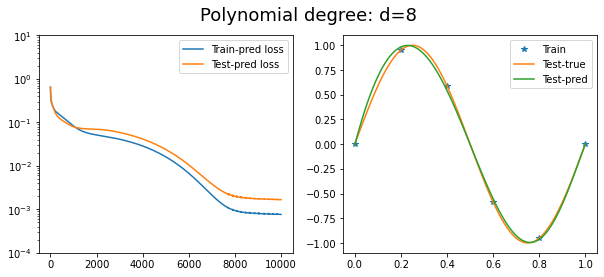

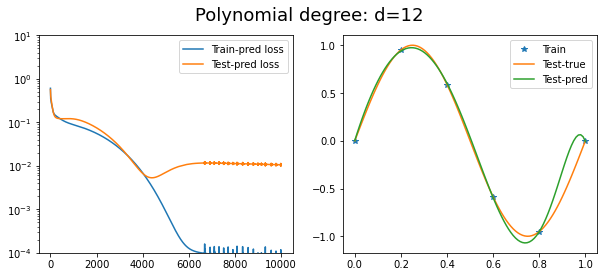

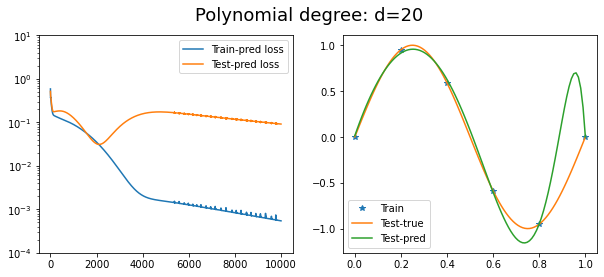

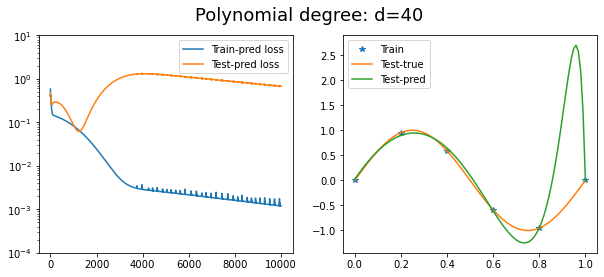

In [4]:
d_list = [1,2,3,4,5,6,8,12,20,40]
final_loss_list = []
for d in d_list:
    final_loss = run(func=func, d=d, lr=0.01, num_epochs=10000, n_train=6, n_test=100)
    final_loss_list.append(final_loss)

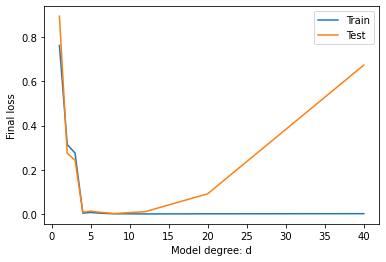

In [6]:
plt.plot(d_list,np.array(final_loss_list)[:,0])
plt.plot(d_list,np.array(final_loss_list)[:,1])
plt.xlabel('Model degree: d')
plt.ylabel('Final loss')
plt.legend(['Train','Test'])

# Switch to slides . . . 